In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2024-12-31'
df = yf.download('AAPL', start, end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440333,6.455079,6.391280,6.422879,493729600
2010-01-05,6.451467,6.487880,6.417460,6.458087,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337110,6.379843,6.291067,6.372319,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500


In [4]:
df = df.reset_index()

In [5]:
df = df.drop(['Date'], axis=1)
df.head()


C:\Users\lmhoa\AppData\Local\Temp\ipykernel_10156\112913868.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440333,6.455079,6.391280,6.422879,493729600
1,6.451467,6.487880,6.417460,6.458087,601904800
2,6.348846,6.477045,6.342226,6.451466,552160000
3,6.337110,6.379843,6.291067,6.372319,477131200
4,6.379241,6.379843,6.291368,6.328683,447610800


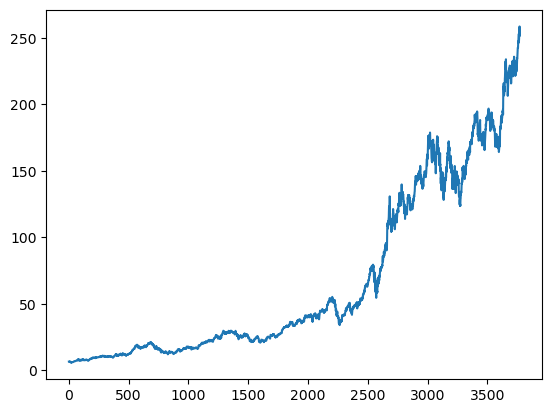

In [6]:
plt.plot(df['Close'])

In [7]:
df 

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440333,6.455079,6.391280,6.422879,493729600
1,6.451467,6.487880,6.417460,6.458087,601904800
2,6.348846,6.477045,6.342226,6.451466,552160000
3,6.337110,6.379843,6.291067,6.372319,477131200
4,6.379241,6.379843,6.291368,6.328683,447610800
...,...,...,...,...,...
3768,254.989655,255.369227,253.171646,254.490204,40858800
3769,257.916443,257.926411,255.009620,255.209412,23234700
3770,258.735504,259.814335,257.347047,257.906429,27237100


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,228.969606
3769,229.357535
3770,229.859200
3771,230.346935


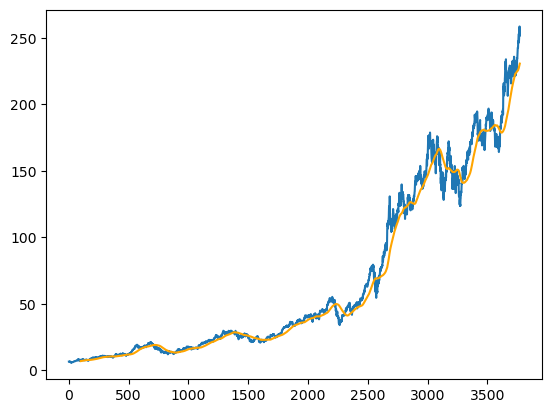

In [9]:
plt.Figure(figsize=(12,6))
plt.plot(df['Close'], label='AAPL')
plt.plot(ma100, label='MA100', color='orange')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,210.752678
3769,211.182569
3770,211.614168
3771,212.039085


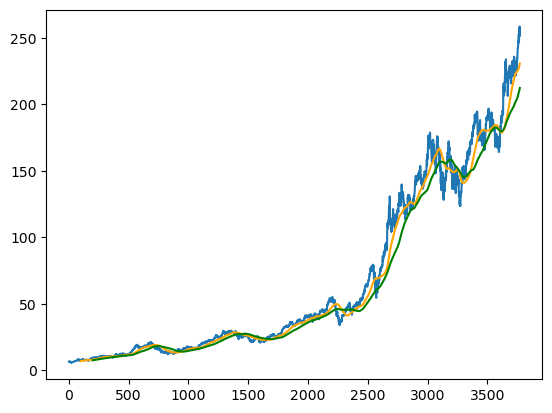

In [11]:
plt.Figure(figsize=(12,6))
plt.plot(df['Close'], label='AAPL')
plt.plot(ma100, label='MA100', color='orange')
plt.plot(ma200, label='MA100', color='green')

In [12]:
df.shape

(3773, 5)

In [13]:
# Splitting into training and testing data
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2641, 1)
(1132, 1)


In [14]:
data_train.head()

Ticker,AAPL
0,6.440333
1,6.451467
2,6.348846
3,6.337110
4,6.379241


In [15]:
from  sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.00792298],
       [0.00805646],
       [0.00682616],
       ...,
       [0.96236646],
       [0.98614268],
       [0.99495288]])

In [18]:
x_train = []
y_train = []

for i in range(100, len(data_train_array)):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# ML model


In [20]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units=50, activation="relu" , return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation="relu" , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu" , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu" ))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
80/80 [==============================] - 15s 128ms/step - loss: 0.0151
Epoch 2/50
80/80 [==============================] - 11s 133ms/step - loss: 0.0041
Epoch 3/50
80/80 [==============================] - 11s 133ms/step - loss: 0.0036
Epoch 4/50
80/80 [==============================] - 11s 131ms/step - loss: 0.0032
Epoch 5/50
80/80 [==============================] - 11s 133ms/step - loss: 0.0031
Epoch 6/50
80/80 [==============================] - 11s 133ms/step - loss: 0.0025
Epoch 7/50
80/80 [==============================] - 10s 131ms/step - loss: 0.0024
Epoch 8/50
80/80 [==============================] - 11s 136ms/step - loss: 0.0024
Epoch 9/50
80/80 [==============================] - 11s 132ms/step - loss: 0.0021
Epoch 10/50
80/80 [==============================] - 11s 133ms/step - loss: 0.0021
Epoch 11/50
80/80 [==============================] - 11s 133ms/step - loss: 0.0021
Epoch 12/50
80/80 [==============================] - 11s 136ms/step - loss: 0.0021
Epoch 13/50
8

In [24]:
model.save('keras_model.h5')

In [25]:
data_test.head()

Ticker,AAPL
2641,88.601044
2642,88.601044
2643,90.971146
2644,90.688873
2645,92.801041


In [26]:
past_100_days = data_train.tail(100)

In [30]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [31]:
final_df.head()

Ticker,AAPL
0,77.664574
1,78.033432
2,77.562630
3,79.404594
4,78.839142


In [32]:
input_data = scaler.transform(final_df)
input_data

array([[0.86182372],
       [0.86624593],
       [0.86060153],
       ...,
       [3.03266612],
       [2.99158962],
       [2.95099187]])

In [33]:
input_data.shape

(1232, 1)

In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [36]:
# Making Predictions
y_predicted = model.predict(x_test)

36/36 [==============================] - 2s 44ms/step


In [37]:
y_predicted.shape

(1132, 1)

In [38]:
y_test

array([0.99294004, 0.99294004, 1.02135496, ..., 3.03266612, 2.99158962,
       2.95099187])

In [39]:
scaler.scale_

array([0.01198891])

In [40]:
scale_factor = 1/0.01198891
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

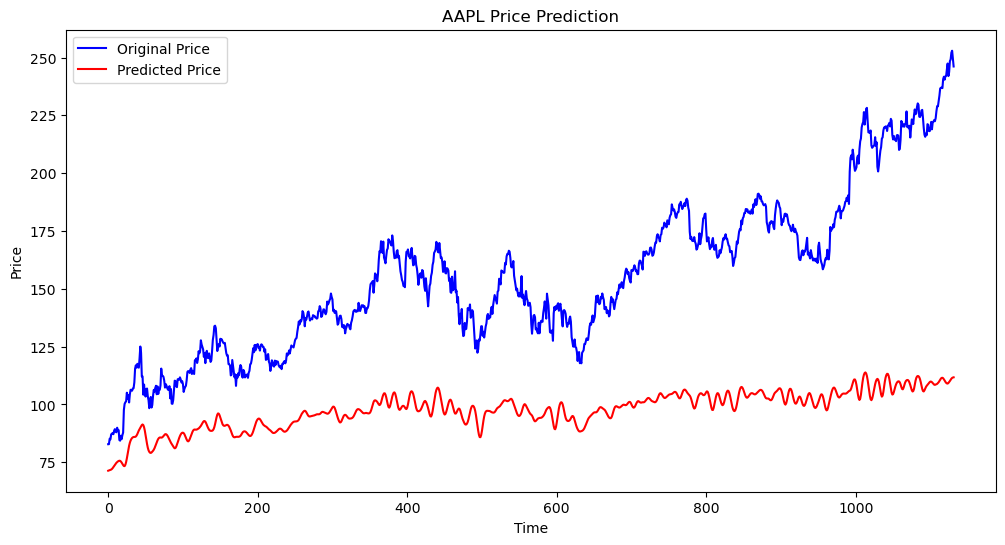

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Original Price', color='blue')
plt.plot(y_predicted, label='Predicted Price', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('AAPL Price Prediction')
plt.show()